# Intro

This is the first practical homework for the ML seminar.

We will work with a dataset called "**MNIST**" which a dataset of images representing handwritten digits. We will **read the data** into memory and create a **table**/matrix using the images and also a vector of **labels** (i.e. 0 if the image represents the digit 0, 1 if it represents the digit 1 etc.). This table and this vector are the **input for the machine learning algorithms** that will be used in the next seminars.


---


### Tools:

- **Google Colab**: in a Jupyter Notebook you can write pieces of python code, run  them and see the results in an interactive manner. So, you do not have only a python script that is run from top to bottom. Now what about Google Colab? Well, Google Colab is to Jupyter Notebook, as Google Docs / Sheets / Presentations are to Microsoft Word / Excel / Powerpoint: a cloud-based alternative for Jupyter Notebook. The advantage is that you do not have to install anything on your local computer. The most packages one needs for data science are already installed on Google Colab.

- **Python**: a programming language used in data science; one can write also in R in Google Colab, but we will stick to Python

- **packages**:
  - **numpy**: useful when working with matrices (data retention, matrix multiplication, inverse etc.) and multi-dimensional arrays (i.e. tensors); we will use it to retain our data (a grayscale image = 1 matrix; a color image = 3 matrices) as a matrix/tensor
  - **PIL**: useful when working with images
  - **matplotlib**: we use matplotlib.pyplot to show images on screen

# Download the data

The data is kept in a ".tar.gz" file.

Run the following two cells to download the data and to untar the file. (Here we do not use python, but command lines for linux; one can use those if the line is prefixed with "!".)

The resulted directory ("mnist") contains 10 directories (one per digit):
- the directory "0" contains 28x28 grayscale images of the digit 0
- ...
- the directory "9" contains 28x28 grayscale images of the digit 9

For example, "mnist/3/1111.png" is an image of a handwritten "three".

In [ ]:
# Data is at: https://drive.google.com/file/d/1NRix26tkjiRra5vN7HCeyc6moAtlhfx8/view?usp=sharing
# Save the cookies needed for download:
!wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate "https://drive.usercontent.google.com/download?id=1NRix26tkjiRra5vN7HCeyc6moAtlhfx8&export=download" -O-
# Load the cookies & download the .tar.gz file:
!wget --load-cookies /tmp/cookies.txt "https://drive.usercontent.google.com/download?id=1NRix26tkjiRra5vN7HCeyc6moAtlhfx8&export=download&confirm=t" -O mnist.tar.gz
# Clean up temporary cookies:
!rm /tmp/cookies.txt

<!DOCTYPE html><html><head><title>Google Drive - Virus scan warning</title><meta http-equiv="content-type" content="text/html; charset=utf-8"/><style nonce="3dYq83zHqbHx_iBu8UW2ZA">.goog-link-button{position:relative;color:#15c;text-decoration:underline;cursor:pointer}.goog-link-button-disabled{color:#ccc;text-decoration:none;cursor:default}body{color:#222;font:normal 13px/1.4 arial,sans-serif;margin:0}.grecaptcha-badge{visibility:hidden}.uc-main{padding-top:50px;text-align:center}#uc-dl-icon{display:inline-block;margin-top:16px;padding-right:1em;vertical-align:top}#uc-text{display:inline-block;max-width:68ex;text-align:left}.uc-error-caption,.uc-warning-caption{color:#222;font-size:16px}#uc-download-link{text-decoration:none}.uc-name-size a{color:#15c;text-decoration:none}.uc-name-size a:visited{color:#61c;text-decoration:none}.uc-name-size a:active{color:#d14836;text-decoration:none}.uc-footer{color:#777;font-size:11px;padding-bottom:5ex;padding-top:5ex;text-align:center}.uc-footer a

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!tar -zxvf mnist.tar.gz

Streaming output truncated to the last 5000 lines.
mnist/7/2237.png
mnist/7/0276.png
mnist/7/3833.png
mnist/7/0067.png
mnist/7/5341.png
mnist/7/1562.png
mnist/7/2447.png
mnist/7/1608.png
mnist/7/6547.png
mnist/7/4992.png
mnist/7/6000.png
mnist/7/1006.png
mnist/7/1479.png
mnist/7/4813.png
mnist/7/4577.png
mnist/7/2781.png
mnist/7/2149.png
mnist/7/4752.png
mnist/7/0023.png
mnist/7/4341.png
mnist/7/3197.png
mnist/7/5397.png
mnist/7/4482.png
mnist/7/4098.png
mnist/7/3627.png
mnist/7/2751.png
mnist/7/1114.png
mnist/7/6982.png
mnist/7/5098.png
mnist/7/1547.png
mnist/7/7034.png
mnist/7/3271.png
mnist/7/2299.png
mnist/7/0905.png
mnist/7/4004.png
mnist/7/0577.png
mnist/7/5078.png
mnist/7/5904.png
mnist/7/5568.png
mnist/7/0465.png
mnist/7/4176.png
mnist/7/1722.png
mnist/7/1021.png
mnist/7/4027.png
mnist/7/1216.png
mnist/7/0557.png
mnist/7/4390.png
mnist/7/0655.png
mnist/7/7284.png
mnist/7/4555.png
mnist/7/4195.png
mnist/7/6824.png
mnist/7/5171.png
mnist/7/5515.png
mnist/7/1194.png
mnist/7/1879.p

# Code

## Ex.1

Read the data into two variables `X` and `y` which are numpy arrays of shape `(70000,28,28)` and `(70000,)` respectively. There are 70000 images in our dataset.

Hint: implement this via `readImage` + `os.listdir` (a for in for...) OR use a function that does (e.g. `tf.keras.preprocessing.image.ImageDataGenerator().flow_from_directory(...).next()` using a batch_size of 70000)



### Helping code

In [ ]:
from PIL import Image
import numpy as np
def readImage(filePath,resize=None,colorMode=None):
  """Read an image from disk.

  Keyword arguments:
  filePath -- where the image is located on disk
  resize -- if not None, then it is of the form (imageHeight, imageWidth); the image will be resized accordingly
  colorMode -- if not None, then it is "rgb" or "grayscale"; the image will be converted to this mode
  """
  im = Image.open(filePath)
  if colorMode:
    if colorMode == "grayscale":
      colorMode = "L"
    elif colorMode == "rgb":
      colorMode = "RGB"
    im = im.convert(colorMode)
  if resize:
    im = im.resize(resize)
  im = np.asarray(im)
  return im

(28, 28)
uint8
['1', '9', '3', '4', '0', '7', '6', '5', '2', '8']
['5071.png', '7090.png', '0154.png', '6761.png', '4224.png', '6627.png', '0736.png', '4239.png', '4780.png', '1602.png', '5533.png', '2913.png', '0620.png', '1455.png', '6690.png', '2367.png', '3768.png', '1662.png', '6519.png', '1901.png', '7530.png', '3270.png', '2695.png', '0345.png', '6375.png', '2420.png', '6866.png', '5558.png', '4465.png', '6934.png', '3285.png', '1649.png', '4235.png', '3333.png', '0200.png', '4557.png', '2390.png', '0663.png', '0607.png', '1993.png', '2677.png', '7600.png', '4656.png', '5594.png', '6065.png', '6440.png', '4135.png', '4248.png', '3694.png', '2051.png', '5426.png', '1237.png', '2334.png', '7509.png', '4366.png', '4219.png', '4743.png', '1967.png', '2040.png', '6588.png', '1657.png', '7830.png', '5705.png', '2556.png', '0275.png', '6563.png', '7469.png', '3948.png', '0754.png', '4782.png', '1516.png', '4292.png', '5868.png', '1635.png', '3939.png', '3548.png', '5935.png', '6480.png

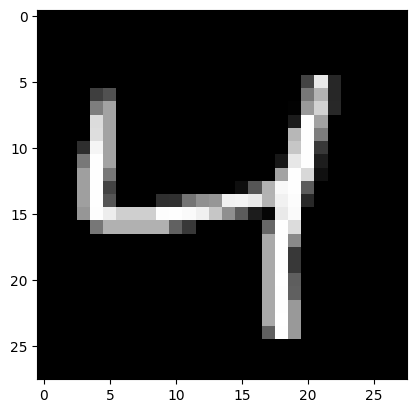

In [ ]:
  img1=readImage("mnist/4/0000.png")
  print(img1.shape)
  print(img1.dtype)
  #a = np.asarray(img1)
  #print(a)
  import matplotlib.pyplot as plt
  plt.imshow(img1,cmap="gray")


list_img_paths = os.listdir("/content/mnist")
dir_path = os.listdir(f"/content/mnist/{list_img_paths[0]}")
print(list_img_paths)
print(dir_path)

### Solution Ex.1

In [ ]:
import os

def readImagesFromDirectory(directory,resize,colorMode):
  """Read images in a directory into numpy arrays.

  Keyword arguments:
  directory -- path to the directory
  resize -- if not None, then it is of the form (imageHeight, imageWidth); each image will be resized accordingly
  colorMode -- if not None, then it is "rgb" or "grayscale"; each image will be converted to this mode
  """
  # matrix
  X = []
  Y = []
  # take an list with all images
  list_dir_paths = os.listdir(directory)

   # process img color
  if colorMode:
      if colorMode == "grayscale":
        colorMode = "L"
      elif colorMode == "rgb":
        colorMode = "RGB"

  for label in list_dir_paths:
    folder_img_path = f"{directory}/{label}"
    list_img_paths = os.listdir(folder_img_path)
    for img_path in list_img_paths:
      # convert each pixel into a value between(0,255) and put that value in a cell from my 28x28 matrix
      # resize that img and recolor if variables is not none
      array_img = readImage(f"{directory}/{label}/{img_path}" ,resize, colorMode)

      X.append(array_img) # we add array of img
      Y.append(int(label)) # we add label for that img

  Y = np.array(Y)
  X = np.array(X)

  print(f"Loaded {len(X)} images with labels")

  return X,Y

In [ ]:
X, Y = readImagesFromDirectory(directory="/content/mnist",resize=(28,28),colorMode="grayscale")

Loaded 70000 images with labels


In [ ]:
X.shape # use "X = X.squeeze()" is X is of shape "(70000,28,28,1)" to get rid fo the last useless dimension

(70000, 28, 28)

In [ ]:
X = X.squeeze()

In [ ]:
Y.shape

(70000,)

The image is digit 5


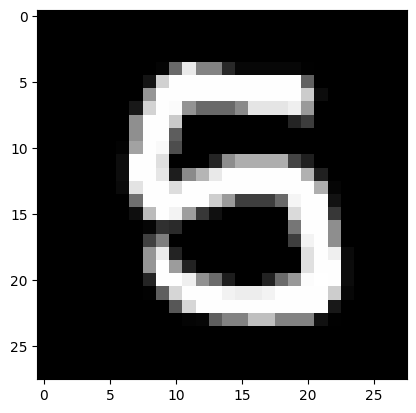

In [ ]:
#@title Show image...
i = 52182 #@param {type:"slider", min:0, max:69999, step:1}
plt.imshow(X[i],cmap="gray")
print("The image is digit {}".format(Y[i]))

## Ex. 2

Make the variable `X` a matrix with one row per image, i.e. a numpy array having the shape `(70000,784)`.

Hint: use `numpy.reshape`

### Helping code

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   8 136 255 216   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 128 253 253 215   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 119 245 253 253  68   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 107 242 253 25

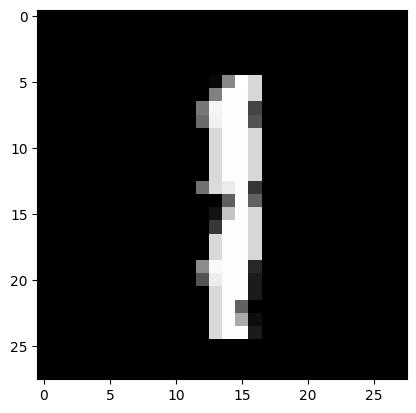

In [ ]:
img=X[0]
plt.imshow(img,cmap="gray")
print(img)
flatImg = img.reshape(img.shape[0]*img.shape[1])
print(flatImg)

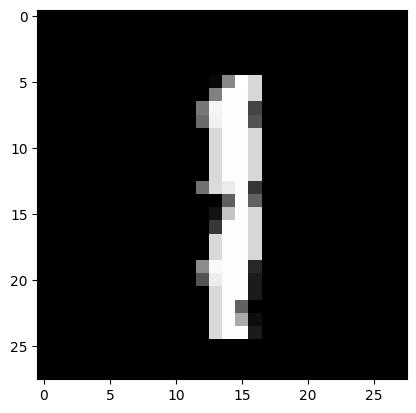

In [ ]:
plt.imshow(flatImg.reshape((28,28)),cmap="gray")

### Solution Ex.2

In [ ]:

# now we reshape X
#a = np.array([[1,2,3],[4,5,6]])
#print(a)
#a = a.reshape(6)
#print(a)

X = np.array([X[i].reshape(28*28) for i in range(nr_imgs)])

nr_imgs = len(Y)
X.shape

(70000, 784)